In [ ]:
Parte 1: Simulación

En esta primera parte, construiremos varios generadores de números aleatorios que usaremos para obtener muestras con distribu-
ción conocida sobre las que vamos a trabajar posteriormente.

1. Utilizando únicamente la función random de su lenguaje (la función que genera un número aleatorio uniforme entre 0 y 1),
implemente una función que genere un número distribuido Bernoulli con probabilidad p.
2. Utilizando la función del punto anterior, implemente otra que genere un número binomial con los parámetros n,p.

3. Utilizando el procedimiento descrito en el capítulo 6 del Dekking (método de la función inversa o de Monte Carlo), imple-
mentar una función que permita generar un número aleatorio con distribución E xp(λ).

4. Investigar como generar números aleatorios con distribución normal. Implementarlo.

Parte 2: Estadística descriptiva
Ahora vamos a aplicar las técnicas vistas en la materia al estudio de algunas muestras de datos.
1. Generar tres muestras de números aleatorios Exp(0,5) de tamaño n = 10, n = 30 y n = 200. Para cada una, computar la media
y varianza muestral. ¿Qué observa?
2. Para las tres muestras anteriores, graficar los histogramas de frecuencias relativas con anchos de banda 0,4, 0,2 y 0,1; es decir,
un total de 9 histogramas. ¿Qué conclusiones puede obtener?
3. Generar una muestra de números Bin(10, 0,3) de tamaño n = 50. Construir la función de distribución empírica de dicha
muestra.

4. A partir de la función de distribución empírica del punto anterior, generar una nueva muestra de números aleatorios utili-
zando el método de simulación de la primera parte. Computar la media y varianza muestral y graficar el histograma.

5. Repetir el experimento de los dos puntos anteriores con dos muestras aleatorias más generadas con los mismos parámetros.
¿Qué conclusión saca?
Parte 3: Convergencia
El propósito de esta sección es ver en forma práctica los resultados de los teoremas de convergencia.
1. Generar cuatro muestras de números aleatorios de tamaño 100, todas con distribución binomial con p = 0,40 y n = 10, n = 20,
n = 50 y n = 100 respectivamente. Graficar sus histogramas. ¿Qué observa?
2. Elija la muestra de tamaño 200 y calcule la media y desviación estándar muestral. Luego, normalice cada dato de la muestra
y grafique el histograma de la muestra normalizada. Justifique lo que observa.
3. Para cada una de las muestras anteriores, calcule la media muestral. Justifique lo que observa.

Parte 4: Estadística inferencial
Para terminar, vamos a hacer inferencia con las muestras que generamos y obtener así información sobre sus distribuciones.
1. Generar dos muestras N(100, 5), una de tamaño n = 10 y otra de tamaño n = 30. Obtener estimaciones puntuales de su media
y varianza.
2. Suponga que ya conoce el dato de que la distribución tiene varianza 5. Obtener intervalos de confianza del 95% y 98% para
la media de ambas muestras.
3. Repita el punto anterior pero usando la varianza estimada s
2
, para la muestra de tamaño adecuado.
4. Probar a nivel 0,99 la hipótesis de que la varianza sea σ
2 > 5. Calcular la probabilidad de cometer error tipo II para la hipótesis
alternativa σ
2 = 6.
5. Agrupando los datos en subgrupos de longitud 0,5, probar a nivel 0,99 la hipótesis de que la muestra proviene de una distribución normal.

In [3]:
#Imports que voy a necesitar

import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns # importando seaborn
# importanto la api de statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math
import collections 
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
# Bibliografia
# https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python
# https://relopezbriega.github.io/blog/2015/06/27/probabilidad-y-estadistica-con-python/
# Fn Binomial: https://www.aglarick.com/2020/02/15/generacion-de-la-distribucion-binomial-en-python-con-jupyter-y-matplotlib/
# Fn Normal: https://stackoverrun.com/es/q/3329235

# Parte 1: Simulación

# Ejercicio 1

In [3]:
# En esta primera parte, construiremos varios generadores de números aleatorios que usaremos para obtener muestras con distribu-
# ción conocida sobre las que vamos a trabajar posteriormente.

# 1. Utilizando únicamente la función random de su lenguaje (la función que genera un número aleatorio uniforme entre 0 y 1),
# implemente una función que genere un número distribuido Bernoulli con probabilidad p.

In [4]:
#Fijo la semilla del random para que siempre sean los mismos datos 
np.random.seed(1)

In [5]:
# np.random.uniform(0,1) "la función que genera un número aleatorio uniforme entre 0 y 1"
# De esta forma, devuelve valores equiprobables entre 0 y 1
# Los valores, los voy a generar de esta forma valor = np.random.uniform(0,1) y dps, comparo con el valor de p (prob)

def fn_bernoulli_random(p):
        if np.random.uniform(0,1) > p:
            return 0
        else:
            return 1

In [6]:
# implemente una función que genere un array de valores distribuido Bernoulli con probabilidad p.
def fn_bernoulli_array(x,p):
    valores = np.zeros((x))
    for i in range(0,x):
        valores[i-1] = fn_bernoulli_random(p)
    return valores
        

In [7]:
val = fn_bernoulli_array(100,0.4)
print(val)
collections.Counter(val) 

[0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0.]


Counter({0.0: 60, 1.0: 40})

In [8]:
# La Distribución de Bernoulli describe un experimento probabilístico en donde el ensayo 
# tiene dos posibles resultados, éxito o fracaso.

# p   es la probabilidad de éxito
# 1−p es la probabilidad de fracaso

bernoulli = stats.bernoulli(p)

# Función de Masa de Probabilidad
fmp = bernoulli.pmf(x) 

# Graficando Bernoulli
fig, ax = plt.subplots()
ax.plot(x, fmp, 'bo')
ax.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6])

plt.title('Distribución Bernoulli')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


NameError: name 'p' is not defined

# Ejercicio 2

2. Utilizando la función del punto anterior, implemente otra que genere un número binomial con los parámetros n,p.

In [29]:
def fn_binomial_random(n,p):
    intentos=[np.random.uniform(0,1) for x in range(0,n)]
    exitos=[intento<=p for intento in intentos]
    return sum(exitos)

In [30]:
val = fn_binomial_random(50,0.4)
print(val)


20


In [31]:
# Implemento funcion para retornar un conjunto de valores aleatorios siguiendo la distribucion binomial
def fn_binomial_array(casos,n,p):
    valores = np.zeros(casos)
    for i in range(0,casos):
        valores[i-1] = fn_binomial_random(n,p)
    return valores
        

In [32]:
val = fn_binomial_array(1000,6,0.5)
print(val)
collections.Counter(val) 

[4. 3. 2. 6. 4. 4. 3. 2. 1. 4. 4. 3. 2. 2. 3. 3. 5. 3. 4. 1. 3. 3. 3. 5.
 3. 3. 3. 2. 1. 3. 3. 3. 6. 3. 2. 4. 4. 1. 3. 4. 5. 4. 3. 2. 2. 3. 0. 2.
 4. 4. 4. 4. 3. 2. 2. 1. 3. 3. 3. 3. 4. 1. 5. 3. 3. 3. 2. 3. 4. 3. 5. 2.
 4. 4. 2. 2. 3. 1. 5. 4. 3. 5. 2. 3. 3. 1. 4. 4. 4. 4. 4. 5. 4. 2. 3. 4.
 4. 2. 2. 3. 4. 2. 5. 3. 2. 5. 3. 2. 2. 2. 3. 3. 1. 3. 3. 2. 3. 0. 4. 5.
 2. 4. 1. 4. 1. 4. 4. 3. 4. 2. 2. 3. 2. 2. 3. 4. 3. 4. 4. 4. 2. 5. 4. 2.
 3. 5. 3. 3. 1. 3. 2. 5. 1. 3. 3. 3. 2. 1. 3. 1. 2. 3. 3. 4. 4. 2. 2. 3.
 2. 4. 5. 1. 4. 2. 5. 3. 2. 6. 4. 4. 1. 5. 2. 4. 4. 4. 2. 5. 3. 4. 3. 1.
 1. 2. 2. 2. 5. 1. 3. 3. 2. 4. 3. 1. 3. 2. 3. 1. 4. 3. 2. 2. 1. 5. 2. 2.
 2. 4. 3. 2. 3. 2. 4. 2. 1. 4. 4. 4. 2. 3. 1. 1. 2. 2. 4. 2. 3. 2. 3. 1.
 2. 2. 4. 3. 3. 3. 2. 2. 3. 4. 2. 4. 4. 2. 2. 4. 3. 2. 3. 3. 0. 4. 4. 3.
 4. 2. 2. 3. 4. 2. 1. 3. 3. 4. 3. 3. 5. 5. 5. 4. 4. 3. 4. 2. 3. 3. 3. 2.
 2. 5. 4. 3. 3. 5. 3. 4. 2. 3. 5. 3. 3. 2. 4. 2. 3. 2. 5. 3. 5. 2. 2. 3.
 1. 0. 2. 2. 2. 2. 4. 3. 4. 3. 2. 1. 1. 5. 2. 3. 5.

Counter({4.0: 232, 3.0: 295, 2.0: 259, 6.0: 14, 1.0: 99, 5.0: 88, 0.0: 13})

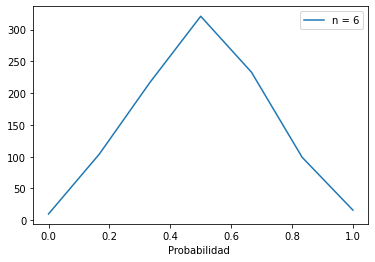

In [33]:
def graficaBinomial(puntostotales, n, p):
    Xs=[k/n    for k in range(0,n+1)]
    Ys=[0    for i in range(0,n+1)]
    puntoactual=0
    while puntoactual<puntostotales:
        ubicacion=fn_binomial_random(n, p)
        Ys[ubicacion]+=1
        puntoactual+=1
    return Xs, Ys

ns=[6]
p=0.5
puntos=1000
for n in ns:
    curva=graficaBinomial(puntos, n, p)
    plt.plot(*curva, label=f'n = {n}')
plt.xlabel('Probabilidad ')
plt.ylabel('')
plt.legend()
plt.show()

# Ejercicio 3

In [ ]:
Utilizando el procedimiento descrito en el capítulo 6 del Dekking (método de la función inversa o de Monte Carlo), imple-
mentar una función que permita generar un número aleatorio con distribución Exp(λ).

Metodo de funcion inversa: pagina 74 del Dekkings

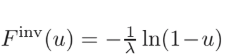

In [15]:
def fn_inversa_exponencial(_lambda, u):
    return -(1/_lambda)* math.log10(u) 


In [16]:
def fn_exponencial_random(_lambda):
    numeroRandomConDistribucionUniforme = np.random.uniform(0,1)
    result = fn_inversa_exponencial(_lambda, numeroRandomConDistribucionUniforme)
    return result

In [17]:
val = fn_exponencial_random(0.5)
print(val)


0.8940074835191912


# Ejercicio 4

In [ ]:
Investigar como generar números aleatorios con distribución normal. Implementarlo.

Usamos el método de Box-muller para generar numeros random siguiendo una distribucion normal 
https://es.wikipedia.org/wiki/M%C3%A9todo_de_Box-Muller

In [18]:
def fn_gaussian_random(mean, stddev): 
    theta = 2 * math.pi * np.random.uniform(0,1) 
    rho = math.sqrt(-2 * math.log10(1 - np.random.uniform(0,1))) 
    scale = stddev * rho 
    x = mean + scale * math.cos(theta) 
    y = mean + scale * math.sin(theta) 
    return y


In [19]:
val = fn_gaussian_random(2, 3)
print(val)

0.4981848370580326


In [89]:
def fn_normal_array(casos,mean,stddev):
    valores = np.zeros(casos)
    for i in range(0,casos):
        valores[i-1] = fn_gaussian_random(mean, stddev)
    return valores

In [90]:
val = fn_normal_array(10,100, 5)
print(val)

[ 95.30038885 104.03212209  93.04336876 100.12974212 101.59796353
  99.91583918  91.74537263  98.53641177  98.82564888 100.60706835]


# Parte 2: Estadística descriptiva

In [ ]:
Ahora vamos a aplicar las técnicas vistas en la materia al estudio de algunas muestras de datos.

# Ejercicio 1

In [ ]:
Generar tres muestras de números aleatorios Exp(0,5) de tamaño n = 10, n = 30 y n = 200. Para cada una, computar la media
y varianza muestral. ¿Qué observa?

In [20]:
def fn_generador_de_muestras_numeros_random_con_dist_exponencial(n,_lambda):
    valores = np.zeros(n)
    for i in range(0,n):
        valores[i-1] = fn_exponencial_random(_lambda)
    
    #Calculo de esperanza
    suma = 0
    for i in range(0,10):
        suma = suma + valores[i]

    esperanza = suma/10

    #Calculo de varianza
    suma = 0
    for i in range(0,10):
        suma = suma + math.pow(valores[i], 2)

    varianza = suma/10 - math.pow(esperanza, 2)

    return valores, esperanza, varianza

Primera muestra con n=10: 

In [21]:
val_n10, esperanza, varianza = fn_generador_de_muestras_numeros_random_con_dist_exponencial(10,0.5)
print(val_n10)
collections.Counter(val_n10) 
print("Media=", esperanza)
print("Varianza=", varianza)

[6.35598669e-02 3.21173490e-01 2.32846076e-03 1.52722526e+00
 1.72569863e+00 6.06134033e-02 3.13761077e-01 2.36090986e+00
 2.43573542e-01 3.60151881e+00]
Media= 1.0220362393146807
Varianza= 1.3678350833277242


Segunda muestra con n=30: 

In [22]:
val_n30, esperanza, varianza = fn_generador_de_muestras_numeros_random_con_dist_exponencial(30,0.5)
print(val_n30)
collections.Counter(val_n30) 
print("Media=", esperanza)
print("Varianza=", varianza)

[0.06957351 0.29561997 1.81126068 3.40316139 3.16303325 3.09622802
 1.21738486 0.13097487 0.53709475 0.5148294  0.14934395 1.81194345
 1.10821995 0.46456166 0.0268186  0.50202749 3.45876858 0.19313338
 1.26538407 0.18613971 0.82264857 0.12743322 0.25321737 0.5094752
 1.73001966 2.44488988 1.83196728 2.70226796 1.93723051 0.24539995]
Media= 1.423916069637373
Varianza= 1.6323142320250112


In [25]:
val_n200, esperanza, varianza = fn_generador_de_muestras_numeros_random_con_dist_exponencial(200,0.5)
print(val_n200)
collections.Counter(val_n200) 
print("Media=", esperanza)
print("Varianza=", varianza)

[0.29383436 0.50406303 3.80229876 2.28564535 0.02889888 0.49114972
 1.38375415 1.19607687 0.25705746 1.41801984 0.47111131 0.02643863
 0.14440876 1.24012867 0.6129511  0.41527866 0.16291095 1.60935555
 3.46208614 2.30952919 0.62611089 0.43458266 0.49000228 0.99688903
 0.00994459 0.47352565 0.84011018 0.51777843 0.25529763 0.34884544
 1.15377196 2.3565167  0.86339892 0.40170847 1.35484198 0.24669206
 2.35388034 1.16900128 0.1886731  1.42693311 0.38837204 0.56022702
 0.06789687 1.15910894 2.36142434 0.26734737 0.22456512 0.08400448
 0.06119421 3.71075365 1.26022529 0.41974175 0.04545264 0.04439178
 0.5088306  0.07658241 0.38551704 0.81785361 0.62674414 0.43747974
 0.51998886 0.06660786 0.07362096 0.80707937 0.03251067 1.51912284
 1.79699031 1.73882331 0.59227908 3.33412154 0.04641062 0.16486771
 3.64671908 1.50800665 0.95755752 1.76547833 0.18357628 0.92502508
 0.05364498 0.47013287 0.11218829 0.14655959 0.08632639 0.67471045
 0.52506317 0.19533748 1.08812221 0.61915855 0.44498642 3.6174

# Ejercicio 2

In [23]:
Para las tres muestras anteriores, graficar los histogramas de frecuencias relativas con anchos de banda 0,4, 0,2 y 0,1; es decir,
un total de 9 histogramas. ¿Qué conclusiones puede obtener?

SyntaxError: invalid syntax (<ipython-input-23-bc7f55201a54>, line 1)

Inicio= 0
Fin= 3


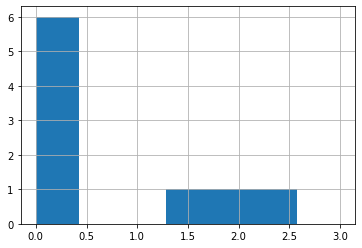

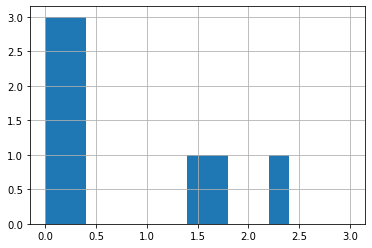

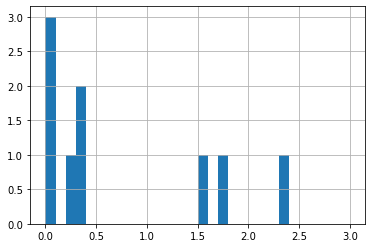

In [26]:
inicio = int(min(val_n10))
fin = int(max(val_n10))
print("Inicio=", inicio)
print("Fin=", fin)
ancho = 0.4
div = np.linspace(inicio,fin,round(1+(fin-inicio)/ancho))
plt.hist(val_n10,div)
plt.grid()
plt.show()
ancho = 0.2
div = np.linspace(inicio,fin,round(1+(fin-inicio)/ancho))
plt.hist(val_n10,div)
plt.grid()
plt.show()
ancho = 0.1
div = np.linspace(inicio,fin,round(1+(fin-inicio)/ancho))
plt.hist(val_n10,div)
plt.grid()
plt.show()


Inicio= 0
Fin= 3


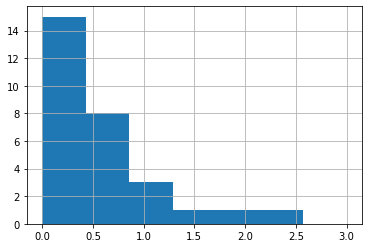

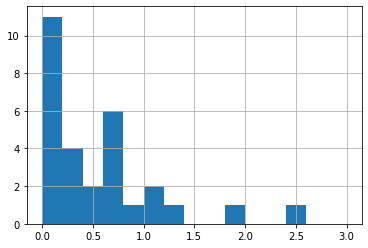

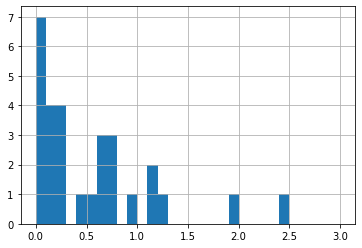

In [80]:
inicio = int(min(val_n30))
fin = int(max(val_n30))
ancho = 0.4
print("Inicio=", inicio)
print("Fin=", fin)
div = np.linspace(inicio,fin,round(1+(fin-inicio)/ancho))
plt.hist(val_n30,div)
plt.grid()
plt.show()
ancho = 0.2
div = np.linspace(inicio,fin,round(1+(fin-inicio)/ancho))
plt.hist(val_n30,div)
plt.grid()
plt.show()
ancho = 0.1
div = np.linspace(inicio,fin,round(1+(fin-inicio)/ancho))
plt.hist(val_n30,div)
plt.grid()
plt.show()

Inicio= 0
Fin= 6


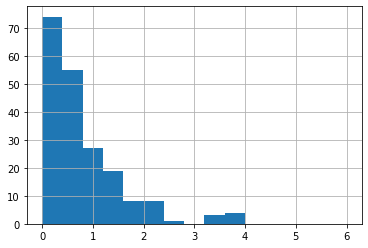

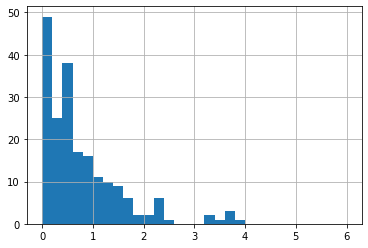

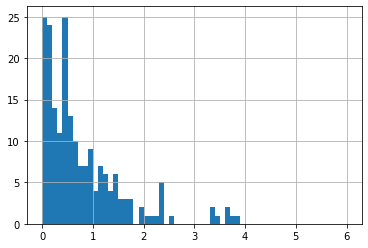

In [27]:
inicio = int(min(val_n200))
fin = int(max(val_n200))
ancho = 0.4
print("Inicio=", inicio)
print("Fin=", fin)
div = np.linspace(inicio,fin,round(1+(fin-inicio)/ancho))
plt.hist(val_n200,div)
plt.grid()
plt.show()
ancho = 0.2
div = np.linspace(inicio,fin,round(1+(fin-inicio)/ancho))
plt.hist(val_n200,div)
plt.grid()
plt.show()
ancho = 0.1
div = np.linspace(inicio,fin,round(1+(fin-inicio)/ancho))
plt.hist(val_n200,div)
plt.grid()
plt.show()

# Ejercicio 3

In [ ]:
# Generar una muestra de números Bin(10, 0.3) de tamaño de muestra N = 50. Construir la función de distribución empírica de dicha
# muestra.

In [34]:
val_e3 = fn_binomial_array(50,10,0.3)
print(val_e3)
collections.Counter(val_e3)

[3. 4. 2. 3. 3. 2. 5. 3. 3. 4. 4. 5. 3. 3. 3. 5. 4. 3. 1. 3. 1. 4. 2. 6.
 2. 2. 2. 4. 5. 4. 3. 4. 1. 4. 4. 4. 2. 2. 4. 2. 4. 3. 0. 3. 1. 5. 2. 3.
 1. 2.]


Counter({3.0: 14, 4.0: 13, 2.0: 11, 5.0: 5, 1.0: 5, 6.0: 1, 0.0: 1})

P(x<0): 0.020
P(x<1): 0.120
P(x<2): 0.340
P(x<3): 0.620
P(x<4): 0.880
P(x<5): 0.980
P(x<6): 1.000


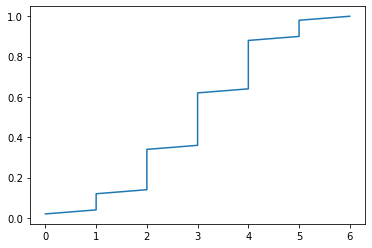

In [35]:
ecdf = ECDF(val_e3)
print('P(x<0): %.3f' % ecdf(0))
print('P(x<1): %.3f' % ecdf(1))
print('P(x<2): %.3f' % ecdf(2))
print('P(x<3): %.3f' % ecdf(3))
print('P(x<4): %.3f' % ecdf(4))
print('P(x<5): %.3f' % ecdf(5))
print('P(x<6): %.3f' % ecdf(6))
# plot the cdf
plt.plot(ecdf.x, ecdf.y)
plt.show()

# Ejercicio 4

In [ ]:
A partir de la función de distribución empírica del punto anterior, generar una nueva muestra de números aleatorios utili-
zando el método de simulación de la primera parte. 
Computar la media y varianza muestral y graficar el histograma.

Inicio= 0
Fin= 6


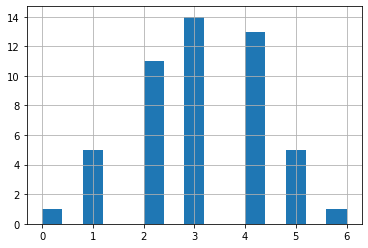

In [36]:
inicio = int(min(val_e3))
fin = int(max(val_e3))
ancho = 0.4
print("Inicio=", inicio)
print("Fin=", fin)
div = np.linspace(inicio,fin,round(1+(fin-inicio)/ancho))
plt.hist(val_e3,div)
plt.grid()
plt.show()

In [ ]:
# Referencia Funcion de Distribucion Empirica
# https://machinelearningmastery.com/empirical-distribution-function-in-python/#:~:text=An%20empirical%20distribution%20function%20can,specific%20observations%20from%20the%20domain.

In [54]:
# esperanza = n*p (binomial)
esperanza = 10 * 0.3
print(esperanza)

3.0


In [56]:
# varianza = n*p*(1-p)
varianza = 10*0.3*(1-0.3)
print(varianza)

2.0999999999999996


# Ejercicio 5

In [ ]:
Repetir el experimento de los dos puntos anteriores con dos muestras aleatorias más generadas con los mismos parámetros.
¿Qué conclusión saca?

# Parte 3: Convergencia

# Ejercicio 1

In [ ]:
# Generar cuatro muestras de números aleatorios de tamaño 100, todas con distribución binomial con p = 0,40 y n = 10, n = 20,
# n = 50 y n = 100 respectivamente. Graficar sus histogramas. ¿Qué observa?

In [38]:
val_e1_p3_10 = fn_binomial_array(100,10,0.4)
print(val_e1_p3_10)
collections.Counter(val_e1_p3_10)

[1. 4. 6. 2. 3. 4. 4. 6. 5. 4. 2. 3. 4. 3. 3. 4. 3. 4. 4. 2. 4. 5. 1. 3.
 4. 3. 3. 6. 4. 2. 3. 6. 6. 5. 5. 3. 4. 6. 4. 3. 1. 5. 6. 5. 3. 6. 1. 5.
 2. 5. 6. 5. 4. 6. 2. 3. 5. 3. 2. 2. 5. 4. 4. 4. 4. 4. 4. 3. 4. 3. 6. 6.
 3. 6. 3. 4. 4. 4. 4. 7. 5. 4. 4. 2. 2. 2. 4. 4. 4. 3. 6. 3. 6. 7. 5. 6.
 4. 7. 5. 5.]


Counter({1.0: 4, 4.0: 31, 6.0: 16, 2.0: 11, 3.0: 20, 5.0: 15, 7.0: 3})

In [39]:
val_e1_p3_20 = fn_binomial_array(100,20,0.4)
print(val_e1_p3_20)
collections.Counter(val_e1_p3_20)

[ 9. 11.  7.  8.  7.  8.  6.  8.  7.  5.  6.  8.  7. 10. 10.  9.  5.  8.
  9.  6. 10.  8.  7.  9.  7.  8.  5.  6.  7.  8.  5.  6. 10.  7.  8.  8.
  9.  8. 13.  9.  7.  4.  6.  6.  6.  8.  9. 11.  9.  7.  8.  7.  7.  7.
  6.  7.  8.  7. 10. 11. 10. 10. 11.  8.  8.  9.  6. 10. 13. 10.  9. 10.
  7.  9.  9.  6. 10.  7. 10.  9. 12.  6.  7. 10.  7. 11.  9.  8.  5. 10.
  8.  4.  6. 11.  6.  5. 12.  7.  6.  6.]


Counter({9.0: 14,
         11.0: 6,
         7.0: 20,
         8.0: 18,
         6.0: 16,
         5.0: 6,
         10.0: 14,
         13.0: 2,
         4.0: 2,
         12.0: 2})

In [40]:
val_e1_p3_50 = fn_binomial_array(100,50,0.4)
print(val_e1_p3_50)
collections.Counter(val_e1_p3_50)

[18. 15. 20. 19. 20. 18. 21. 20. 17. 24. 21. 17. 23. 22. 26. 21. 18. 20.
 15. 21. 15. 22. 18. 20. 24. 24. 18. 18. 22. 21. 19. 19. 22. 21. 14. 24.
 21. 18. 19. 22. 12. 15. 15. 21. 18. 19. 13. 17. 28. 16. 23. 18. 21. 12.
 18. 16. 25. 18. 26. 19. 21. 21. 15. 26. 24. 22. 24. 23. 15. 20. 18. 16.
 23. 22. 21. 21. 23. 19. 21. 15. 20. 17. 15. 21. 22. 14. 21. 19. 23. 19.
 17. 19. 25. 23. 22. 18. 20. 19. 17. 23.]


Counter({18.0: 13,
         15.0: 9,
         20.0: 8,
         19.0: 11,
         21.0: 16,
         17.0: 6,
         24.0: 6,
         23.0: 8,
         22.0: 9,
         26.0: 3,
         14.0: 2,
         12.0: 2,
         13.0: 1,
         28.0: 1,
         16.0: 3,
         25.0: 2})

In [41]:
val_e1_p3_100 = fn_binomial_array(100,100,0.4)
print(val_e1_p3_100)
collections.Counter(val_e1_p3_100)

[30. 39. 36. 50. 40. 52. 37. 40. 46. 41. 43. 38. 46. 44. 42. 50. 33. 35.
 39. 32. 44. 44. 33. 41. 42. 45. 37. 40. 39. 46. 45. 38. 42. 35. 41. 31.
 41. 40. 43. 43. 44. 46. 45. 38. 36. 45. 38. 40. 44. 40. 47. 36. 38. 40.
 38. 35. 39. 35. 44. 44. 38. 44. 40. 30. 43. 47. 39. 34. 37. 44. 40. 45.
 47. 43. 50. 41. 40. 44. 42. 43. 39. 35. 37. 35. 35. 34. 40. 39. 33. 44.
 47. 49. 53. 32. 49. 40. 35. 42. 43. 37.]


Counter({30.0: 2,
         39.0: 7,
         36.0: 3,
         50.0: 3,
         40.0: 12,
         52.0: 1,
         37.0: 5,
         46.0: 4,
         41.0: 5,
         43.0: 7,
         38.0: 7,
         44.0: 11,
         42.0: 5,
         33.0: 3,
         35.0: 8,
         32.0: 2,
         45.0: 5,
         31.0: 1,
         47.0: 4,
         34.0: 2,
         49.0: 2,
         53.0: 1})

Inicio= 1
Fin= 7
Valor pico de frecuencia= 4.0


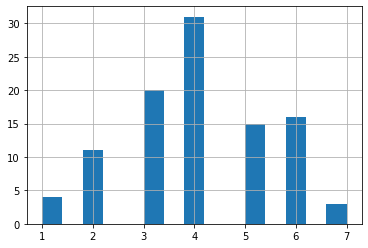

In [48]:
inicio = int(min(val_e1_p3_10))
fin = int(max(val_e1_p3_10))
print("Inicio=", inicio)
print("Fin=", fin)
print("Valor pico de frecuencia=", 10*0.4)
ancho = 0.4
div = np.linspace(inicio,fin,round(1+(fin-inicio)/ancho))
plt.hist(val_e1_p3_10,div)
plt.grid()
plt.show()

Inicio= 4
Fin= 13
Valor pico de frecuencia= 8.0


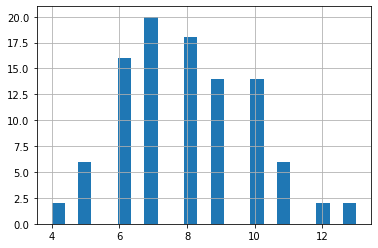

In [49]:
inicio = int(min(val_e1_p3_20))
fin = int(max(val_e1_p3_20))
print("Inicio=", inicio)
print("Fin=", fin)
print("Valor pico de frecuencia=", 20*0.4)
ancho = 0.4
div = np.linspace(inicio,fin,round(1+(fin-inicio)/ancho))
plt.hist(val_e1_p3_20,div)
plt.grid()
plt.show()

Inicio= 12
Fin= 28
Valor pico de frecuencia= 20.0


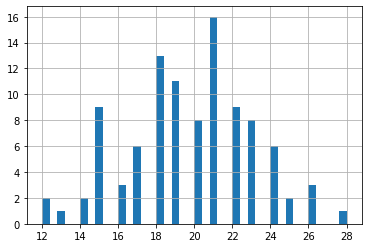

In [50]:
inicio = int(min(val_e1_p3_50))
fin = int(max(val_e1_p3_50))
print("Inicio=", inicio)
print("Fin=", fin)
print("Valor pico de frecuencia=", 50*0.4)
ancho = 0.4
div = np.linspace(inicio,fin,round(1+(fin-inicio)/ancho))
plt.hist(val_e1_p3_50,div)
plt.grid()
plt.show()

Inicio= 30
Fin= 53
Valor pico de frecuencia= 40.0


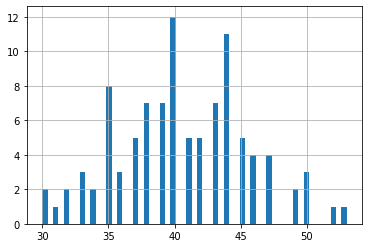

In [51]:
inicio = int(min(val_e1_p3_100))
fin = int(max(val_e1_p3_100))
print("Inicio=", inicio)
print("Fin=", fin)
print("Valor pico de frecuencia=", 100*0.4)
ancho = 0.4
div = np.linspace(inicio,fin,round(1+(fin-inicio)/ancho))
plt.hist(val_e1_p3_100,div)
plt.grid()
plt.show()

In [ ]:
# CONCLUSION: Teniendo en cuenta el p=0.4, puedo estimar que el pico de frencuencia en cada uno, va a estar determinado por el 
# valor del rango que sea valor_maximo*0.4 (aproximadamente)

# Ejercicio 2

In [52]:
# Elija la muestra de tamaño 200 y calcule la media y desviación estándar muestral. Luego, normalice cada dato de la muestra
# y grafique el histograma de la muestra normalizada. Justifique lo que observa.

In [53]:
val_e2_p3_200 = fn_binomial_array(200,10,0.4)
print(val_e2_p3_200)
collections.Counter(val_e2_p3_200)

[2. 5. 4. 4. 6. 5. 6. 3. 4. 4. 2. 4. 6. 0. 3. 3. 6. 3. 4. 2. 3. 2. 3. 6.
 5. 4. 4. 5. 3. 3. 4. 5. 4. 2. 6. 4. 6. 5. 3. 3. 2. 4. 5. 6. 4. 4. 1. 3.
 5. 4. 3. 3. 6. 7. 3. 3. 3. 6. 4. 5. 5. 3. 4. 5. 5. 4. 3. 5. 2. 5. 5. 3.
 4. 7. 6. 6. 5. 4. 5. 4. 3. 4. 2. 1. 4. 6. 7. 2. 5. 3. 2. 2. 4. 5. 4. 4.
 4. 2. 3. 5. 4. 5. 2. 4. 5. 5. 5. 7. 2. 3. 3. 4. 4. 3. 4. 5. 6. 3. 4. 6.
 5. 6. 5. 6. 3. 7. 3. 7. 4. 5. 3. 6. 4. 3. 3. 0. 3. 2. 5. 2. 6. 5. 4. 1.
 3. 4. 6. 7. 5. 3. 6. 5. 3. 5. 2. 5. 2. 4. 4. 4. 4. 3. 6. 2. 5. 5. 4. 3.
 4. 4. 4. 4. 5. 3. 5. 5. 5. 4. 7. 3. 5. 4. 5. 4. 3. 6. 8. 4. 3. 3. 3. 5.
 8. 4. 3. 6. 3. 8. 4. 4.]


Counter({2.0: 19,
         5.0: 43,
         4.0: 53,
         6.0: 24,
         3.0: 45,
         0.0: 2,
         1.0: 3,
         7.0: 8,
         8.0: 3})

In [57]:
# esperanza = n*p (binomial)
esperanza = 10 * 0.4
print(esperanza)

4.0


In [58]:
# varianza = n*p*(1-p)
varianza = 10*0.4*(1-0.4)
print(varianza)

2.4


Inicio= 0
Fin= 8
Valor pico de frecuencia= 4.0


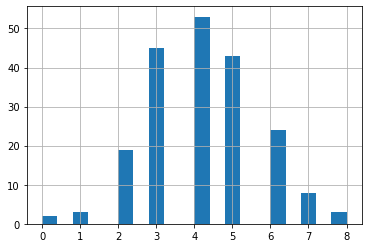

In [59]:
inicio = int(min(val_e2_p3_200))
fin = int(max(val_e2_p3_200))
print("Inicio=", inicio)
print("Fin=", fin)
print("Valor pico de frecuencia=", esperanza)
ancho = 0.4
div = np.linspace(inicio,fin,round(1+(fin-inicio)/ancho))
plt.hist(val_e2_p3_200,div)
plt.grid()
plt.show()

In [77]:
# Para normalizar el valor, tomo la siguiente normalización = ( x – min(x) ) / ( max(x) – min(x) )

minimo = (min(val_e2_p3_200))
maximo = (max(val_e2_p3_200))

calculo_b = maximo - minimo

normal = np.zeros((200))

for i in range(0,200):
    valor = val_e2_p3_200[i-1]
    calculo_a = valor - minimo
    calculo = calculo_a / calculo_b
    normal[i-1] = calculo

print(normal)

0.5
[0.25  0.625 0.5   0.5   0.75  0.625 0.75  0.375 0.5   0.5   0.25  0.5
 0.75  0.    0.375 0.375 0.75  0.375 0.5   0.25  0.375 0.25  0.375 0.75
 0.625 0.5   0.5   0.625 0.375 0.375 0.5   0.625 0.5   0.25  0.75  0.5
 0.75  0.625 0.375 0.375 0.25  0.5   0.625 0.75  0.5   0.5   0.125 0.375
 0.625 0.5   0.375 0.375 0.75  0.875 0.375 0.375 0.375 0.75  0.5   0.625
 0.625 0.375 0.5   0.625 0.625 0.5   0.375 0.625 0.25  0.625 0.625 0.375
 0.5   0.875 0.75  0.75  0.625 0.5   0.625 0.5   0.375 0.5   0.25  0.125
 0.5   0.75  0.875 0.25  0.625 0.375 0.25  0.25  0.5   0.625 0.5   0.5
 0.5   0.25  0.375 0.625 0.5   0.625 0.25  0.5   0.625 0.625 0.625 0.875
 0.25  0.375 0.375 0.5   0.5   0.375 0.5   0.625 0.75  0.375 0.5   0.75
 0.625 0.75  0.625 0.75  0.375 0.875 0.375 0.875 0.5   0.625 0.375 0.75
 0.5   0.375 0.375 0.    0.375 0.25  0.625 0.25  0.75  0.625 0.5   0.125
 0.375 0.5   0.75  0.875 0.625 0.375 0.75  0.625 0.375 0.625 0.25  0.625
 0.25  0.5   0.5   0.5   0.5   0.375 0.75  0.25  0.625 0

In [78]:
df = pd.DataFrame({"valor":val_e2_p3_200,"normalizado":normal})

In [79]:
print(df)

     valor  normalizado
0      2.0        0.250
1      5.0        0.625
2      4.0        0.500
3      4.0        0.500
4      6.0        0.750
..     ...          ...
195    6.0        0.750
196    3.0        0.375
197    8.0        1.000
198    4.0        0.500
199    4.0        0.500

[200 rows x 2 columns]


Inicio= 0
Fin= 1


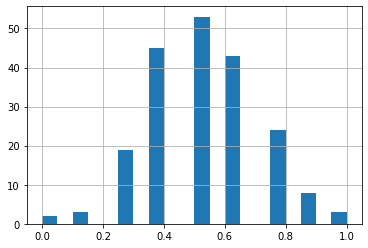

In [86]:
inicio = int(min(normal))
fin = int(max(normal))
print("Inicio=", inicio)
print("Fin=", fin)

ancho = 0.05
div = np.linspace(inicio,fin,round(1+(fin-inicio)/ancho))
plt.hist(normal,div)
plt.grid()
plt.show()

In [85]:
# En el primer conjunto, la esperanza de la binomial, me da que en el valor 4 tendre el pico de frencuencia de ocurrencia
# Cuando normalizo los valores a un intervalo {0,1}, el valor representado de 4 es 0,5 esto en el histograma
# me muestra el valor con mayor frecuencia de ocurrencia.

# Ejercicio 3

In [87]:
# Para cada una de las muestras anteriores, calcule la media muestral. Justifique lo que observa.

# Parte 4

# Ejercicio 1

In [88]:
# Generar dos muestras N(100, 5), una de tamaño n = 10 y otra de tamaño n = 30. Obtener estimaciones puntuales de su media
# y varianza.

In [91]:
val_e1_p4_10 = fn_normal_array(10,100, 5)
print(val_e1_p4_10)

[109.51242497 100.60701802  99.85992465  96.78359883 105.13857495
  93.44184738 104.03751907  96.8696699   97.43588219  99.74166938]


In [92]:
val_e1_p4_30 = fn_normal_array(30,100, 5)
print(val_e1_p4_30)

[ 99.15632436  98.53231205  95.21964442 100.67244067 101.10858486
  98.25748275  99.89964534 105.29050145  99.4393062  102.95544039
 100.63654295 104.36354166  97.68837395  95.43086712  98.21949901
  96.79595825 101.68189959 103.46881955 100.78438571 106.97088787
  98.86341968  97.52206264 104.28652445 101.61296184  94.59103368
  93.56491131 101.11615541  97.46024968  99.15143132 102.30833181]


In [101]:
suma_a = 0
for i in range(0,10):
    suma_a = suma_a + val_e1_p4_10[i-1]

In [102]:
print(suma_a/10)


100.34281293524539


In [103]:
varianza_a = 0
for i in range(0,10):
    varianza_a = varianza_a + (val_e1_p4_10[i-1]-suma_a)**2

In [104]:
print(varianza_a/10)

815583.3087913853


In [106]:
suma_b = 0
for i in range(0,30):
    suma_b = suma_b + val_e1_p4_30[i-1]

In [107]:
print(suma_b/30)

99.90165133181742


In [108]:
varianza_b = 0
for i in range(0,30):
    varianza_b = varianza_b + (val_e1_p4_30[i-1]-suma_b)**2

In [109]:
print(varianza_b/30)

8393475.994740667
